In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [167]:
df_ibovespa = pd.read_csv("/content/Dados Históricos - Ibovespa (1).csv")

In [168]:
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,08.01.2024,131.972,132.023,132.215,131.033,"5,23M","-0,04%"
1,05.01.2024,132.023,131.218,132.635,130.579,"9,20M","0,61%"
2,04.01.2024,131.226,132.831,132.885,131.024,"8,97M","-1,21%"
3,03.01.2024,132.834,132.697,133.576,132.250,"8,70M","0,10%"
4,02.01.2024,132.697,134.186,134.195,132.095,"8,44M","-1,11%"


In [169]:
df_ibovespa.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1239,11.01.2019,93.658,93.806,93.961,93.359,"5,50M","-0,16%"
1240,10.01.2019,93.806,93.599,93.987,93.050,"4,99M","0,21%"
1241,09.01.2019,93.613,92.033,93.626,92.028,"5,17M","1,72%"
1242,08.01.2019,92.032,91.699,92.231,91.064,"4,64M","0,36%"
1243,07.01.2019,91.699,91.845,92.552,91.288,"4,71M","-0,15%"


In [170]:
df_ibovespa.shape

(1244, 7)

In [171]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      1244 non-null   object 
 1   Último    1244 non-null   float64
 2   Abertura  1244 non-null   float64
 3   Máxima    1244 non-null   float64
 4   Mínima    1244 non-null   float64
 5   Vol.      1244 non-null   object 
 6   Var%      1244 non-null   object 
dtypes: float64(4), object(3)
memory usage: 68.2+ KB


In [172]:
df_ibovespa["Data"] = pd.to_datetime(df_ibovespa["Data"], dayfirst=True) # transformando a coluna de data em datetime

In [173]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1244 non-null   datetime64[ns]
 1   Último    1244 non-null   float64       
 2   Abertura  1244 non-null   float64       
 3   Máxima    1244 non-null   float64       
 4   Mínima    1244 non-null   float64       
 5   Vol.      1244 non-null   object        
 6   Var%      1244 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 68.2+ KB


In [174]:
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2024-01-08,131.972,132.023,132.215,131.033,"5,23M","-0,04%"
1,2024-01-05,132.023,131.218,132.635,130.579,"9,20M","0,61%"
2,2024-01-04,131.226,132.831,132.885,131.024,"8,97M","-1,21%"
3,2024-01-03,132.834,132.697,133.576,132.250,"8,70M","0,10%"
4,2024-01-02,132.697,134.186,134.195,132.095,"8,44M","-1,11%"


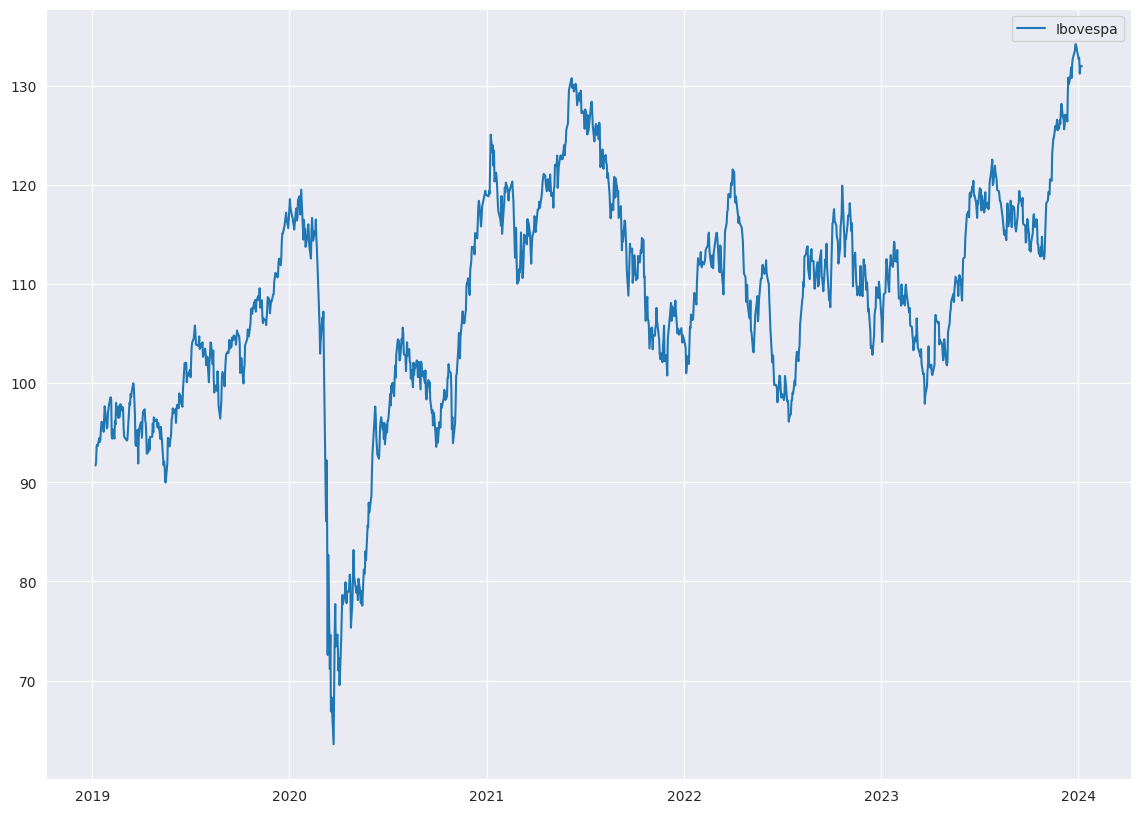

In [175]:
plt.figure(figsize = (14,10))
plt.plot(df_ibovespa['Data'], df_ibovespa['Último'], label='Ibovespa')

plt.legend(loc='best')
plt.show()

In [176]:
df = df_ibovespa
df = df_ibovespa.drop(columns=["Abertura", "Máxima", "Mínima", "Vol.", "Var%"])
df = df.set_index("Data")

In [177]:
seasonplot = seasonal_decompose(df, model='multiplicative', period=5)

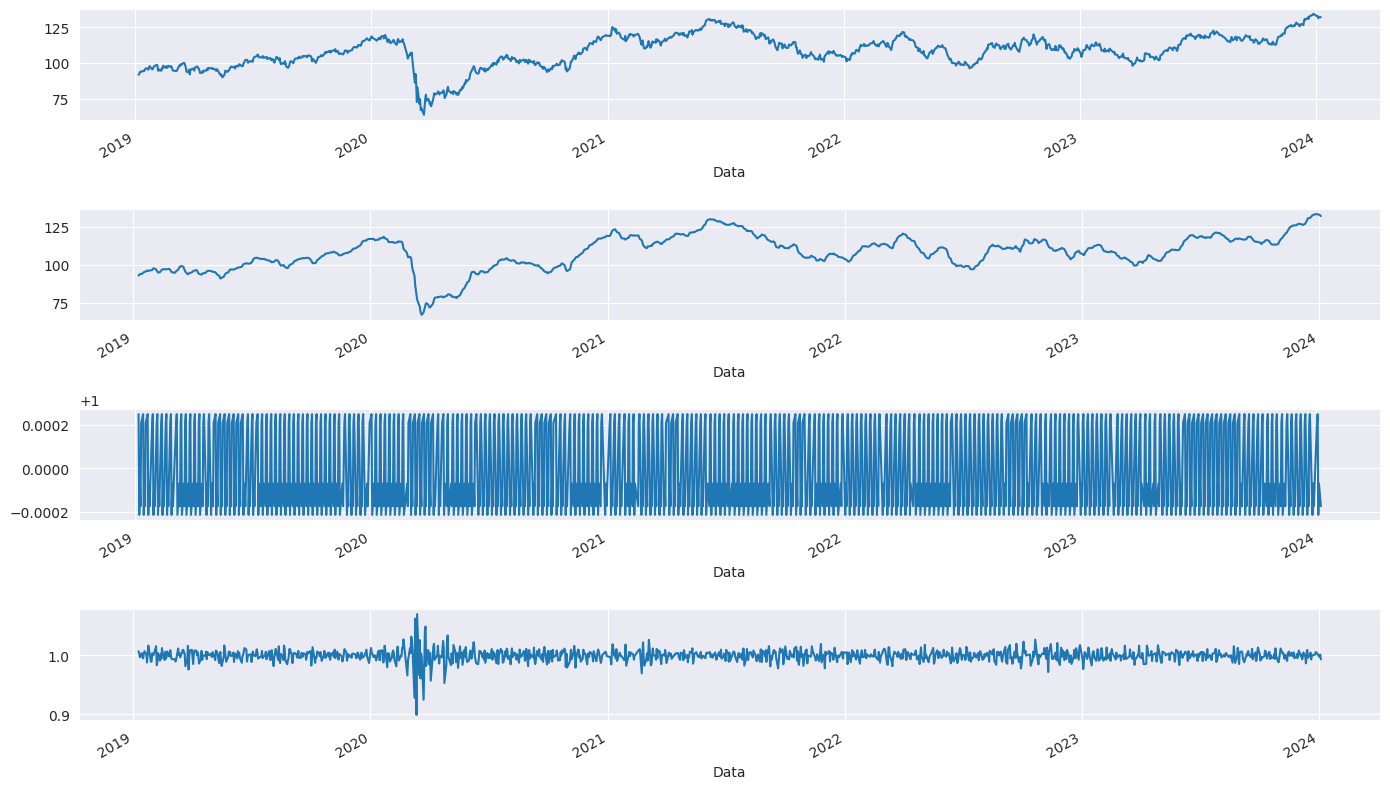

In [178]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14,8))

seasonplot.observed.plot(ax=ax1)       #serie real
seasonplot.trend.plot(ax=ax2)          #tendencia
seasonplot.seasonal.plot(ax=ax3)       #sazonalidade
seasonplot.resid.plot(ax=ax4)          #residuos
plt.tight_layout()

In [179]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p-value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [180]:
sns.set_style('darkgrid')

In [181]:
x = df.Último.values

In [182]:
result = adfuller(x)

print("Teste ADF")
print(f"Teste ADF Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores Críticos: ")

for key, value in result[4].items():
  print(f"\t {key}: {value}")

Teste ADF
Teste ADF Estatístico: -3.0923778867424137
P-Value: 0.027122425335324243
Valores Críticos: 
	 1%: -3.4356560275160835
	 5%: -2.8638831211270817
	 10%: -2.568017509711682


In [183]:
# P-Value menor que 0.05% - Série Estacionária (????)

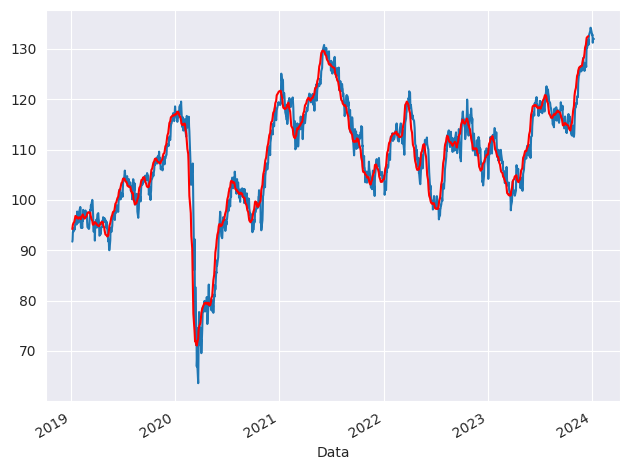

In [184]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

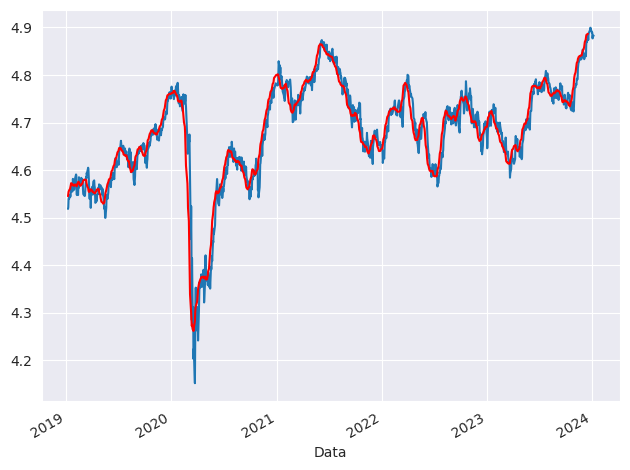

In [185]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

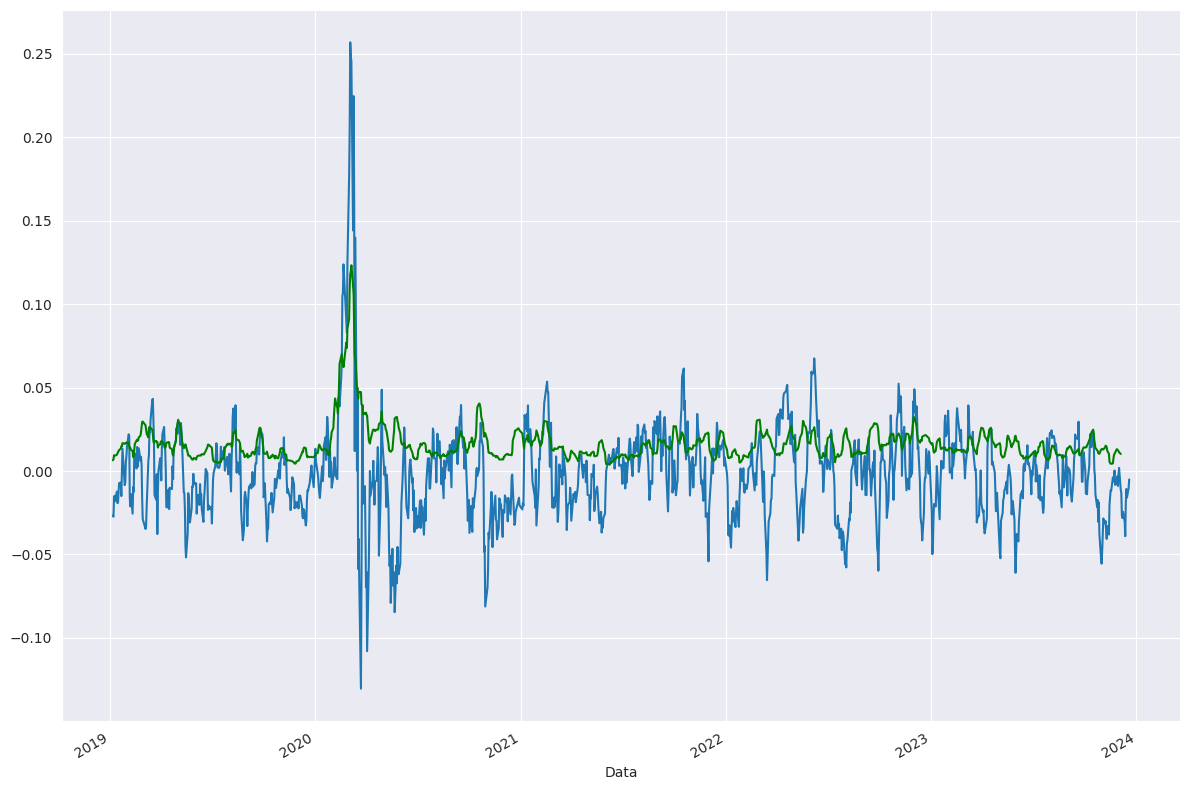

In [186]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std() #desvio padrão

f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(12)
df_s.plot(ax=ax, legend=False)
# ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [187]:
x_s = df_s.Último.values

result_s = adfuller(x_s)

print("Teste ADF")
print(f"Teste ADF Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores Críticos: ")

for key, value in result_s[4].items():
  print(f"\t {key}: {value}")

Teste ADF
Teste ADF Estatístico: -8.736596744689413
P-Value: 3.0883032884171193e-14
Valores Críticos: 
	 1%: -3.435699433298302
	 5%: -2.863902271843875
	 10%: -2.5680277086214076


Teste ADF
Teste ADF Estatístico: -11.448490980867856
P-Value: 5.937421251410293e-21
Valores críticos:
	1%: -3.435761408287299
	5%: -2.863929614852828
	10%: -2.568042270495956


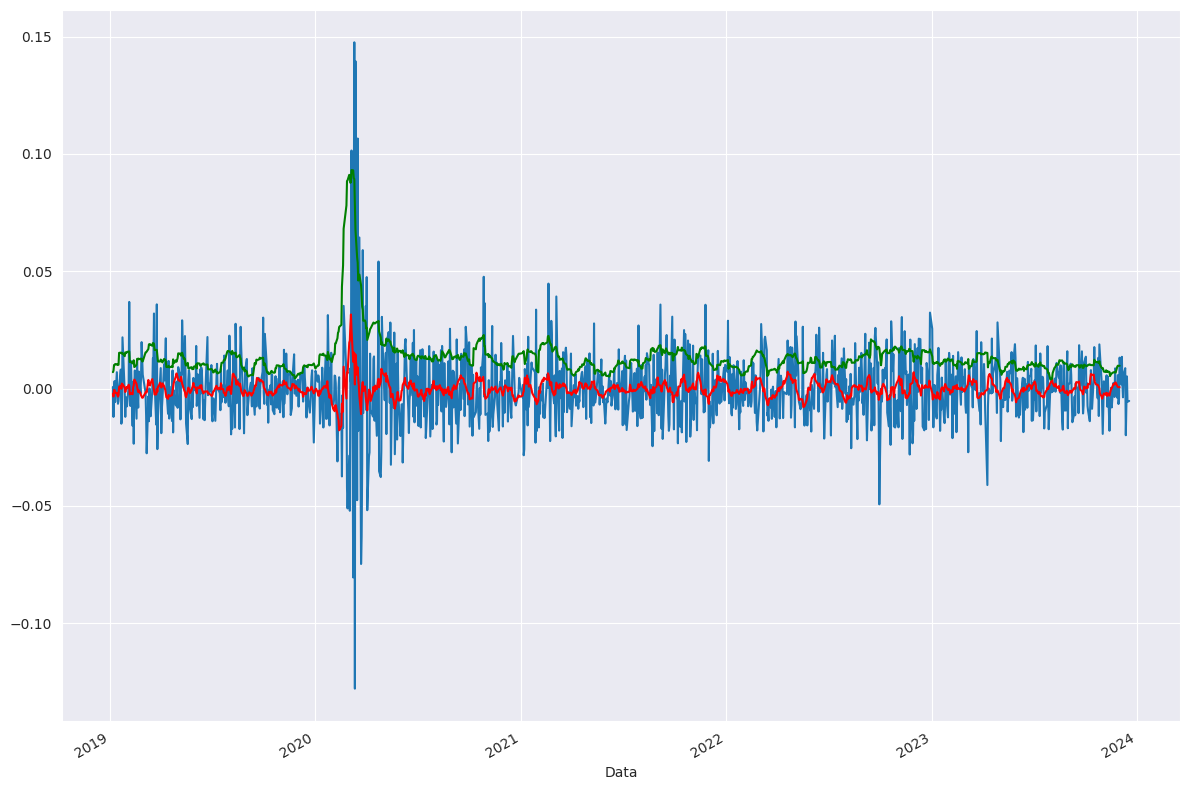

In [188]:
df_diff = df_s.diff(1) #primeira derivada
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(12)
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

x_diff = df_diff.Último.dropna().values
result_diff = adfuller(x_diff)

print("Teste ADF")
print(f"Teste ADF Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [189]:
# fora as variações discrepantes do ibovespa em 2020 (pandemia?) a série parece ser estacionária

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1244 entries, 2024-01-08 to 2019-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Último  1244 non-null   float64
dtypes: float64(1)
memory usage: 19.4 KB


In [191]:
df.head(3)

,Último
Data,
2024-01-08,131.972
2024-01-05,132.023
2024-01-04,131.226


#ARIMA

In [191]:
# ARIMA - (AR): Componente auroregressivo / (I): Integrado / (MA): Média móvel

# A(x,y,z) -> ACF, PACF (autocorrelação e autocorrelação parcial)

In [200]:
lag_acf = acf(df_diff.dropna(), nlags=29)
lag_pacf = pacf(df_diff.dropna(), nlags=29)

In [201]:
# 5% da autocorrelação
# 1.96/sqrt(N-d) ----> N = número de pontos do df ----> d = número de vezes que nós diferenciamos o df

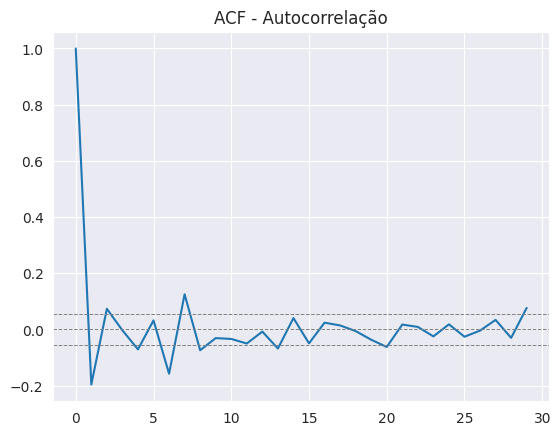

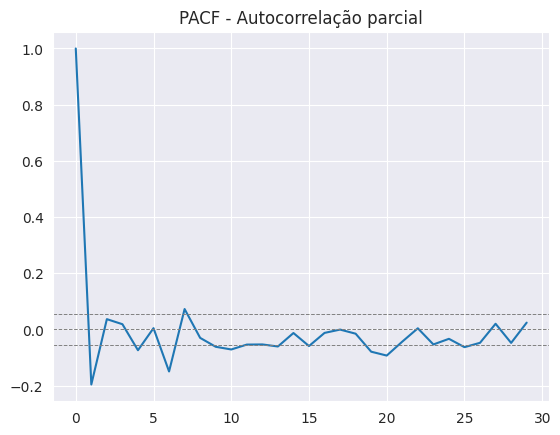

In [202]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("ACF - Autocorrelação")
plt.show()


plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.title("PACF - Autocorrelação parcial")
plt.show()

In [ ]:
# A (x, y, z)
# x = ACF, ponto onde a linha cruza o limite superior pela primeira vez. 1?
# y = PACF, ponto onde a linha cruza o limite superior pela primeira vez. 1 também

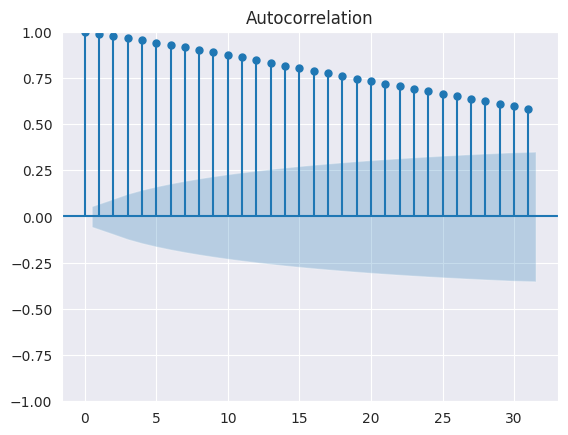

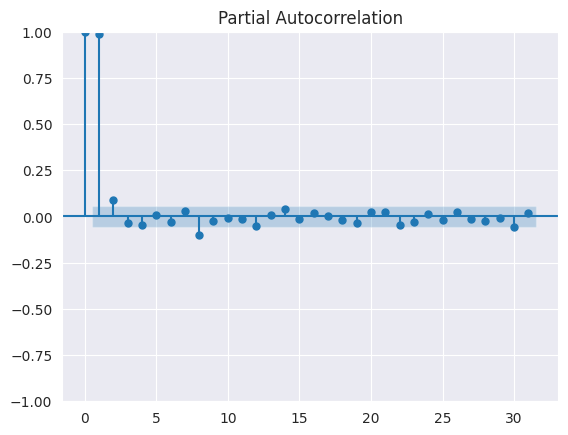

In [205]:
plot_acf(df.Último)
plot_pacf(df.Último)
plt.show()